In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ca_restaurant_reviews=pd.read_csv("california_restaurants.csv")

In [3]:
ca_restaurant_reviews=ca_restaurant_reviews.reset_index(drop = True)


In [4]:
ca_restaurant_reviews.head(1)

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,review_stars,text,date
0,2456,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...",Restaurants,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",bFPdtzu11Oi0f92EAcjqmg,5,What a great addition to the Funk Zone! Grab ...,2016-10-13 22:50:47


In [5]:
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from tqdm import tqdm_notebook

from collections import Counter

In [6]:
import string
def clean_text(sample_review):
    stopwords = nltk.corpus.stopwords.words('english')
    newStopWords = ['ive','hadnt','couldnt','didnt', 'id'] 
    stopwords.extend(newStopWords)
    text = sample_review

    text = text[2: len(sample_review)-1].lower()
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    
    l = [word for word in nopunc.split() if word.lower() not in stopwords]
    clean_text = ""
    for word in l:
        clean_text += str(word)+" "
    
    return clean_text.strip()

In [7]:
sample_review = ca_restaurant_reviews.text[20]
display(clean_text(sample_review))

'place short walk hotel wonderful find awesome ambiance pleasant service lemon blueberry scone best ever anywhere full berries ham cheese croissant delicious took fresh made bread us take wine tasting later afternoon also noticed located near figueroa mountain brewing co perfect want sandwich beer'

In [8]:
import string
def get_words(text):

    stopwords = nltk.corpus.stopwords.words('english')
    newStopWords = ['ive','hadnt','couldnt','didnt', 'id'] 
    stopwords.extend(newStopWords)
    text = text[2: len(sample_review)-1].lower()  
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    display(text)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    display(nopunc)
    
    l = [word for word in nopunc.split() if word.lower() not in stopwords]
    
    return l, len(l)

In [9]:
for i in range(1):
    sample_review = str(ca_restaurant_reviews.text[i])
    check = get_words(sample_review)
    display(check[0])

'at a great addition to the funk zone!  grab a bite, grab some tastings, life is good. right next door to the santa barbara wine collective, in fact it actually shares the same tables.  we had a fabulous savory croissant'

'at a great addition to the funk zone  grab a bite grab some tastings life is good right next door to the santa barbara wine collective in fact it actually shares the same tables  we had a fabulous savory croissant'

['great',
 'addition',
 'funk',
 'zone',
 'grab',
 'bite',
 'grab',
 'tastings',
 'life',
 'good',
 'right',
 'next',
 'door',
 'santa',
 'barbara',
 'wine',
 'collective',
 'fact',
 'actually',
 'shares',
 'tables',
 'fabulous',
 'savory',
 'croissant']

In [10]:
pd.set_option('display.precision', 2)
ca_restaurant_reviews.describe()

,Unnamed: 0,postal_code,latitude,longitude,stars,review_count,is_open,review_stars
count,2.05e+05,205464.00,205464.00,205464.00,205464.00,205464.00,205464.00,205464.00
mean,2.36e+06,93101.13,34.42,-119.72,3.95,667.85,0.81,3.95
std,1.34e+06,41.12,0.06,0.08,0.51,736.33,0.39,1.34
min,2.46e+03,93013.00,34.39,-120.08,1.50,5.00,0.00,1.00
25%,1.23e+06,93101.00,34.41,-119.74,3.50,200.00,1.00,3.00
50%,2.39e+06,93101.00,34.42,-119.70,4.00,405.00,1.00,4.00
75%,3.63e+06,93109.00,34.43,-119.69,4.50,885.00,1.00,5.00
max,4.56e+06,96161.00,39.38,-119.51,5.00,3834.00,1.00,5.00


In [11]:
print(ca_restaurant_reviews["review_stars"].value_counts())
type(ca_restaurant_reviews["review_stars"].value_counts())

5    102470
4     45823
3     21149
1     20272
2     15750
Name: review_stars, dtype: int64


pandas.core.series.Series

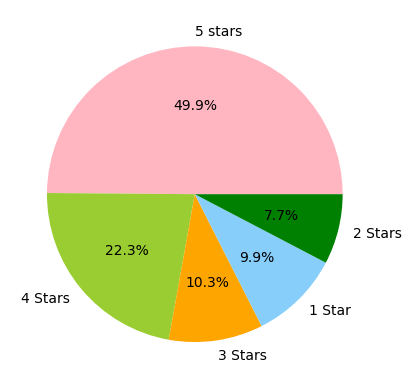

In [12]:
labels = "5 stars","4 Stars", "3 Stars","1 Star","2 Stars"
sizes = ca_restaurant_reviews["review_stars"].value_counts()
colors = ['lightpink', 'yellowgreen', 'orange', 'lightskyblue','green']
 
# Plot
plt.pie(sizes, labels=labels,colors =colors, autopct='%1.1f%%') 
# plt.axis('equal')
plt.show()

In [13]:
from tqdm import tqdm

In [14]:
texts = []
stars = [ca_restaurant_reviews['review_stars'] for review in ca_restaurant_reviews]
pbar = tqdm(total=ca_restaurant_reviews.shape[0]+1)
for index, row in ca_restaurant_reviews.iterrows():
    texts.append(clean_text(row['text']))
    pbar.update(1)
pbar.close()

100%|█████████▉| 205464/205465 [01:09<00:00, 2963.59it/s]


In [15]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3))
vectors = vectorizer.fit_transform(texts)

Wall time: 1min 7s


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, stars[1], test_size=0.15, random_state=42, shuffle =False)

In [17]:
%%time
from sklearn.svm import LinearSVC
classifier = LinearSVC()

classifier.fit(X_train, y_train)

Wall time: 51.1 s


LinearSVC()

In [18]:
preds = classifier.predict(X_test)
print("Actual Ratings(Stars): ",end = "")
display(y_test[:5])
print("Predicted Ratings: ",end = "")
print(preds[:5])

Actual Ratings(Stars): 

174644    5
174645    3
174646    5
174647    4
174648    4
Name: review_stars, dtype: int64

Predicted Ratings: [5 5 5 5 4]


In [19]:
X_null, X_full_test, y_null, y_full_test = train_test_split(vectors, stars[1], test_size=0.999995, random_state=42, shuffle = False)
predict_all = classifier.predict(X_full_test)

In [20]:
predicted_stars = list(predict_all)

print("Actual Ratings(Stars): ")
print(y_full_test[154730:154736])
print("\nPredicted Ratings: ",end = "")
print(predicted_stars[154730:154736])

Actual Ratings(Stars): 
154731    1
154732    3
154733    3
154734    4
154735    2
154736    3
Name: review_stars, dtype: int64

Predicted Ratings: [1, 3, 3, 4, 2, 3]


In [21]:
ca_restaurant_reviews.shape

(205464, 19)

In [22]:
predicted_stars.append(3)

In [23]:
print("\nOriginal Reviews (with user bias)")
display(ca_restaurant_reviews.tail(10))

print("\nUnbiased Reviews (with predicted rating using user's review text)")
unbiased_reviews_dataset = ca_restaurant_reviews

# dropping actual ratings(stars) by user
#unbiased_reviews_dataset = unbiased_reviews_dataset.drop('review_stars', 1)

# adding the unbiased predicted rating
unbiased_reviews_dataset['predict'] = predicted_stars

display(unbiased_reviews_dataset.tail(10))


Original Reviews (with user bias)


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,review_stars,text,date
205454,4559987,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",qW-Q3krGy2FgY1ouN0znjQ,5,Santa Barbara has lots of good pizza. \nThis o...,2018-10-18 20:35:16
205455,4559988,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",X0NlTMV_-DNpGM0sPFa_cA,5,Great pizza with good beer. Stopped in and we ...,2015-05-02 22:25:45
205456,4559989,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",_ymxPyUR2_tuoPJP8t67gQ,1,forgot to write a review until now- didn't hav...,2013-09-16 12:11:56
205457,4559990,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",avcQbkVRQ0skWZS1rkoAQg,4,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09
205458,4559991,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",agYoN0HOl6KBkAkIZaJmFg,3,3.4 star review. Nice concept. I like the loca...,2014-12-14 16:41:07
205459,4559992,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",o72LSEPHKu1oQcpXeIVlag,5,This is one of my new favorite pizza joints he...,2015-04-11 04:43:19
205460,4559993,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",u30sv3s4V2tz5VOgNQYtgg,4,Ordered vegan chicken and Daiya cheese and onl...,2015-05-26 15:27:36
205461,4559994,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",Mp97BPH2Y7O1DsFt6wFp4Q,1,This was the worst pizza I've ever had ever ea...,2019-07-08 19:27:04
205462,4559995,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",06egjh3nrEb7EXX1VYZOCg,5,One of the best pizzas in SB....seriously!!!\n...,2014-07-07 18:40:39
205463,4559996,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",vTjt5vVDuW-Xu1Z_tfraTQ,5,We wanted a calzone and it was getting around ...,2016-11-06 05:15:44



Unbiased Reviews (with predicted rating using user's review text)


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,review_stars,text,date,predict
205454,4559987,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",qW-Q3krGy2FgY1ouN0znjQ,5,Santa Barbara has lots of good pizza. \nThis o...,2018-10-18 20:35:16,5
205455,4559988,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",X0NlTMV_-DNpGM0sPFa_cA,5,Great pizza with good beer. Stopped in and we ...,2015-05-02 22:25:45,1
205456,4559989,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",_ymxPyUR2_tuoPJP8t67gQ,1,forgot to write a review until now- didn't hav...,2013-09-16 12:11:56,5
205457,4559990,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",avcQbkVRQ0skWZS1rkoAQg,4,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09,3
205458,4559991,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",agYoN0HOl6KBkAkIZaJmFg,3,3.4 star review. Nice concept. I like the loca...,2014-12-14 16:41:07,5
205459,4559992,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",o72LSEPHKu1oQcpXeIVlag,5,This is one of my new favorite pizza joints he...,2015-04-11 04:43:19,5
205460,4559993,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",u30sv3s4V2tz5VOgNQYtgg,4,Ordered vegan chicken and Daiya cheese and onl...,2015-05-26 15:27:36,1
205461,4559994,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",Mp97BPH2Y7O1DsFt6wFp4Q,1,This was the worst pizza I've ever had ever ea...,2019-07-08 19:27:04,5
205462,4559995,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",06egjh3nrEb7EXX1VYZOCg,5,One of the best pizzas in SB....seriously!!!\n...,2014-07-07 18:40:39,5
205463,4559996,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.44,-119.74,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...",Restaurants,"{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",vTjt5vVDuW-Xu1Z_tfraTQ,5,We wanted a calzone and it was getting around ...,2016-11-06 05:15:44,3


In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.7119402985074627


In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y_test, preds, average='weighted')))
print ('Recall: ' + str(recall_score(y_test, preds, average='weighted')))

Precision: 0.6822727835840492
Recall: 0.7119402985074627


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.65      0.80      0.72      2796
           2       0.50      0.26      0.34      2149
           3       0.53      0.33      0.41      2866
           4       0.52      0.39      0.44      6087
           5       0.79      0.93      0.86     16922

    accuracy                           0.71     30820
   macro avg       0.60      0.54      0.56     30820
weighted avg       0.68      0.71      0.69     30820



In [27]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 2249   246    99    50   152]
 [  795   566   412   194   182]
 [  296   275   949   922   424]
 [   58    42   284  2365  3338]
 [   45     7    39  1018 15813]]
Normalized confusion matrix
[[8.04e-01 8.80e-02 3.54e-02 1.79e-02 5.44e-02]
 [3.70e-01 2.63e-01 1.92e-01 9.03e-02 8.47e-02]
 [1.03e-01 9.60e-02 3.31e-01 3.22e-01 1.48e-01]
 [9.53e-03 6.90e-03 4.67e-02 3.89e-01 5.48e-01]
 [2.66e-03 4.14e-04 2.30e-03 6.02e-02 9.34e-01]]


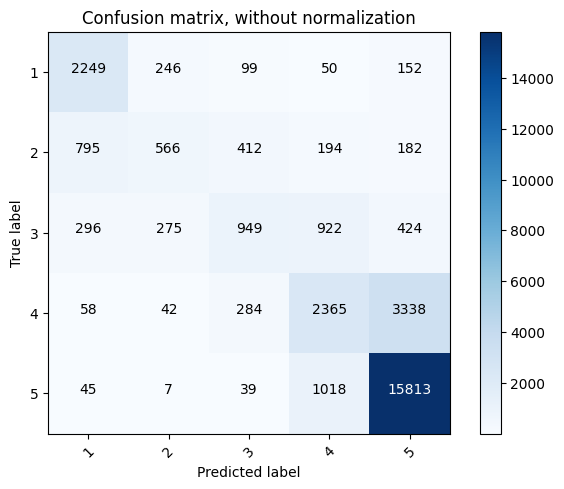

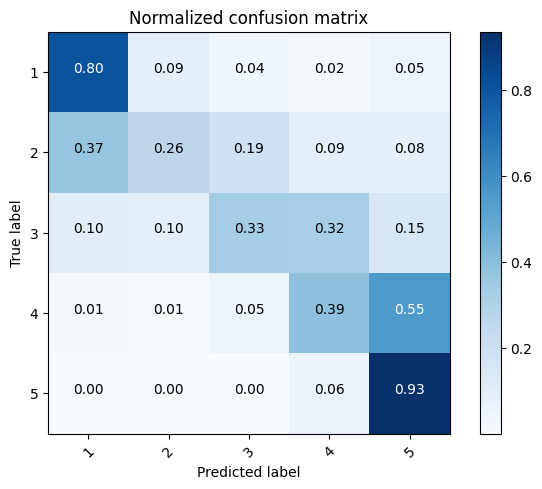

In [28]:
from sklearn import metrics
names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [29]:
sentiments = []
for star in stars[1]:
    if star <= 3:
        sentiments.append('n')
    if star > 3:
        sentiments.append('p')

print(len(sentiments))    

205464


In [30]:
X2_train, X2_test, y2_train, y2_test = train_test_split(vectors, sentiments, test_size=0.20, random_state=42)

In [31]:
%%time

classifier2 = LinearSVC()
classifier2.fit(X2_train, y2_train)

Wall time: 12.4 s


LinearSVC()

In [32]:
preds2 = classifier2.predict(X2_test)
print("Actual Class:    ",end = "")
print(y2_test[:10])
print("\nPredicted Class: ",end = "")
print(list(preds2[:10]))

Actual Class:    ['p', 'p', 'p', 'p', 'p', 'p', 'n', 'p', 'p', 'n']

Predicted Class: ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'n']


In [33]:
print(accuracy_score(y2_test, preds2))

0.9273598909789988


In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y2_test, preds2, average='weighted')))
print ('Recall: ' + str(recall_score(y2_test, preds2, average='weighted')))

Precision: 0.9266755135168885
Recall: 0.9273598909789988


In [35]:
print(classification_report(y2_test, preds2))

              precision    recall  f1-score   support

           n       0.91      0.82      0.86     11334
           p       0.93      0.97      0.95     29759

    accuracy                           0.93     41093
   macro avg       0.92      0.89      0.91     41093
weighted avg       0.93      0.93      0.93     41093



In [36]:
print(metrics.confusion_matrix(y2_test, preds2))

[[ 9286  2048]
 [  937 28822]]


Confusion matrix, without normalization
[[ 9286  2048]
 [  937 28822]]
Normalized confusion matrix
[[0.82 0.18]
 [0.03 0.97]]


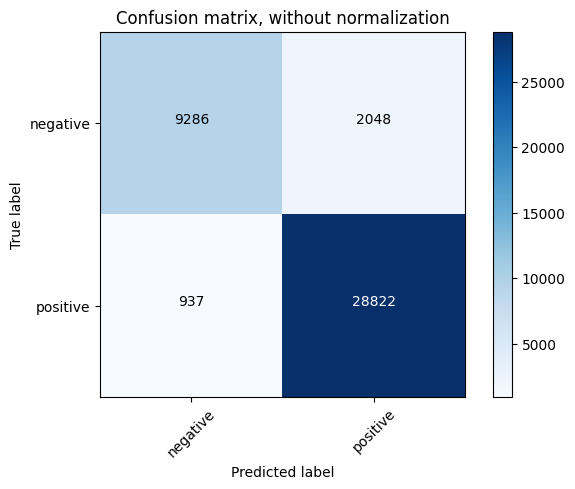

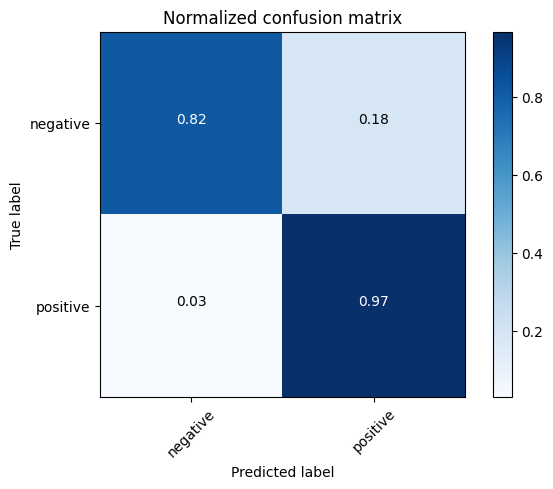

In [37]:
class_names = ['negative','positive']

cnf_matrix = metrics.confusion_matrix(y2_test, preds2)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()